In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import scipy

from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

matplotlib.style.use('ggplot')
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 50)


In [90]:
data_rating = pd.io.parsers.read_csv('raw/rating.csv')
#data_rating = data_rating.loc[data_rating['user_id'] != 48766]
data_anime = pd.io.parsers.read_csv('raw/anime.csv')

train_rating = pd.io.parsers.read_csv('omer/rating_train.csv')
test_rating = pd.io.parsers.read_csv('omer/rating_test.csv')

print "Animes: "
print data_anime.describe()
print data_anime.median()
print data_anime['rating'].mode()

print "\nRatings: "
print data_rating.describe()

Animes: 
                  anime_id               rating              members
count            12,294.00            12,064.00            12,294.00
mean             14,058.22                 6.47            18,071.34
std              11,455.29                 1.03            54,820.68
min                   1.00                 1.67                 5.00
25%               3,484.25                 5.88               225.00
50%              10,260.50                 6.57             1,550.00
75%              24,794.50                 7.18             9,437.00
max              34,527.00                10.00         1,013,917.00
anime_id              10,260.50
rating                     6.57
members                1,550.00
dtype: float64
0                   6.00
dtype: float64

Ratings: 
                   user_id             anime_id               rating
count         7,813,737.00         7,813,737.00         7,813,737.00
mean             36,727.96             8,909.07                 6.14
s

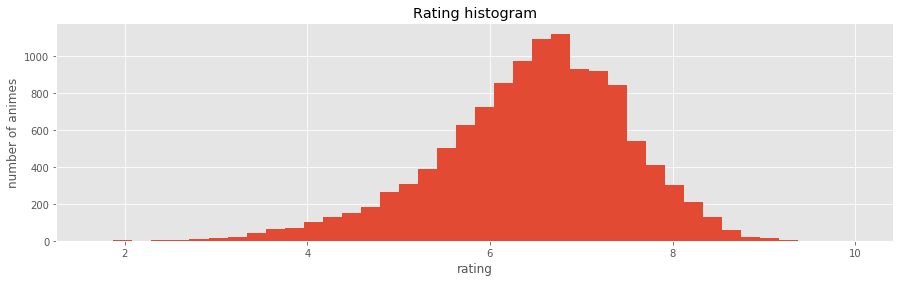

In [67]:
plot = data_anime['rating'].plot(kind="hist", bins=40,figsize=(15,4))
plot.set_xlabel('rating')
plot.set_ylabel('number of animes')
plt.title('Rating histogram')
plt.show()

                         0
count            73,515.00
mean                106.29
std                 153.09
min                   1.00
25%                  18.00
50%                  57.00
75%                 136.00
max              10,227.00
0                  57.00
dtype: float64
   0
0  1


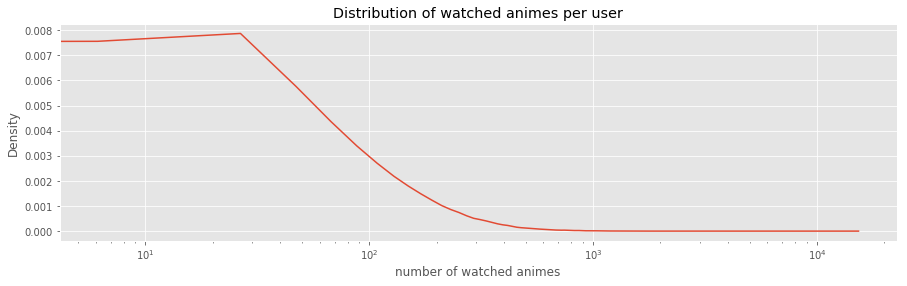

In [87]:
plot = data_rating.groupby('user_id').size().to_frame().sort_values(by=0).plot(kind="density",logx=True, figsize=(15,4), legend=False)
plot.set_xlabel('number of watched animes')
print data_rating.groupby('user_id').size().to_frame().describe()
print data_rating.groupby('user_id').size().to_frame().median()
print data_rating.groupby('user_id').size().to_frame().mode()
plt.title('Distribution of watched animes per user')
plt.show()

Anime rating:
count              12,064.00
mean                    6.47
std                     1.03
min                     1.67
25%                     5.88
50%                     6.57
75%                     7.18
max                    10.00
Name: rating, dtype: float64

Rating: TV
count               3,671.00
mean                    6.90
std                     0.86
min                     2.67
25%                     6.44
50%                     6.94
75%                     7.46
max                     9.60
Name: rating, dtype: float64

Rating: OVA
count               3,285.00
mean                    6.38
std                     0.86
min                     2.00
25%                     5.85
50%                     6.38
75%                     6.92
max                     9.25
Name: rating, dtype: float64

Rating: Movie
count               2,297.00
mean                    6.32
std                     1.21
min                     1.92
25%                     5.42
50%               

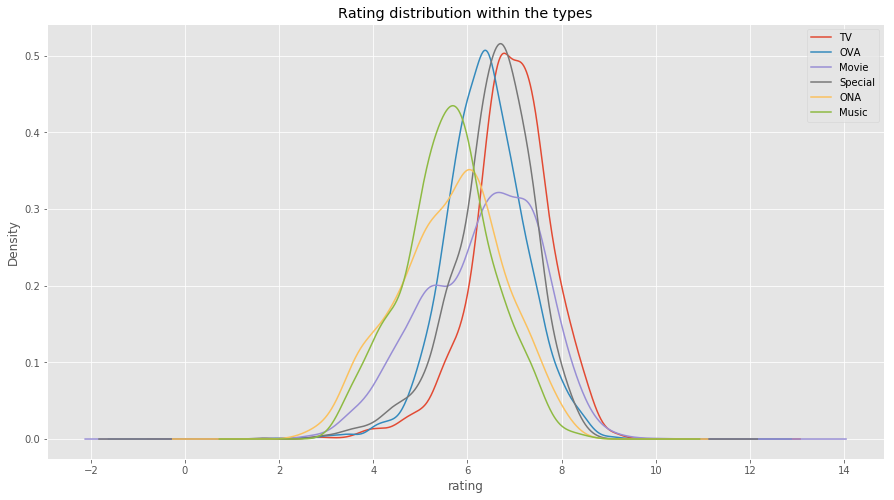

In [63]:
print 'Anime rating:'
print data_anime['rating'].describe(include='all')

for t in ['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']:
    print '\nRating: ' + t
    print data_anime.loc[data_anime['type'] == t]['rating'].describe(include='all')
    plot = data_anime.loc[data_anime['type'] == t]['rating'].plot(kind="density", figsize=(15,8))

plot.set_xlabel('rating')

L=plt.legend()
for i, t in enumerate(['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']):
    L.get_texts()[i].set_text(t)

plt.title('Rating distribution within the types')
plt.show()

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space', 'Sports', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi']
37
12294
43
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']

set(['Josei', 'Police', 'Yuri', 'Shounen Ai', 'Super Power', 'Shoujo Ai'])


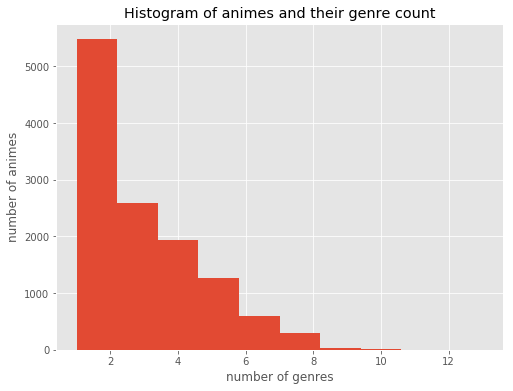

In [72]:
_genre = data_anime['genre']
_genre_list = []
genre_count = []
unique_genre = []
for g in _genre:
    try:
        gs = g.split(',')
        if len(gs) == 1:
            unique_genre.extend(gs)
        _genre_list.extend(map(lambda s: s.strip(), gs))
        genre_count.append(gs)
    except:
        pass
    
#print genre_count / len(data_anime) 

print sorted(set(unique_genre))
print len(sorted(set(unique_genre)))

print len(data_anime) 
print len(sorted(set(_genre_list)))
print sorted(set(_genre_list))
print
print set(_genre_list) - set(unique_genre)

plot = pd.DataFrame(map(lambda x: len(x), genre_count)).plot(kind='hist', bins=10, legend=False, figsize=(8,6))
plot.set_ylabel('number of animes')
plot.set_xlabel('number of genres')
plt.title('Histogram of animes and their genre count')
plt.show()

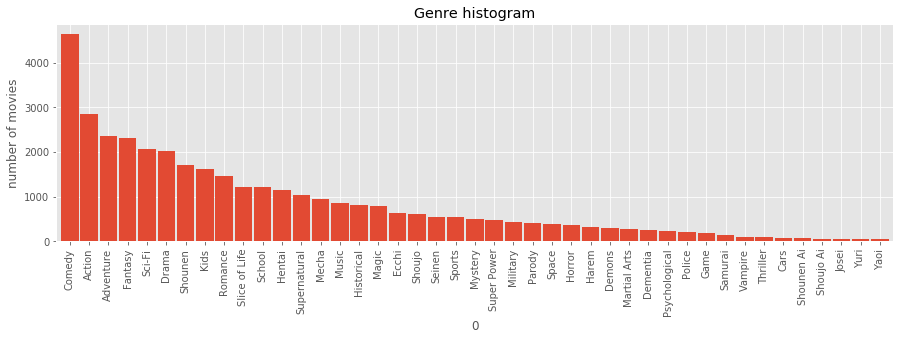

In [73]:
genre_count = pd.DataFrame(_genre_list).groupby(0)
plot = genre_count.size().sort_values(ascending=False).plot(kind="bar", width=0.9, figsize=(15,4))
plot.set_ylabel('number of movies')
plt.title('Genre histogram')
plt.show()

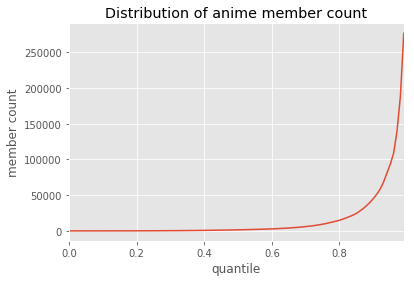

In [75]:
members = data_anime['members'].cumsum()

plot = data_anime['members'].quantile(np.arange(0.0, 1.0, 0.01)).plot(kind="line")
plot.set_xlabel('quantile')
plot.set_ylabel('member count')
plt.title('Distribution of anime member count')
plt.show()

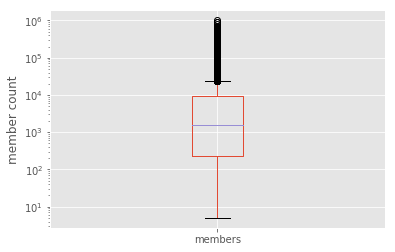

In [41]:
plot = data_anime['members'].plot(kind="box", logy=True)
plot.set_ylabel('member count')
plt.show()

                         0
count            68,247.00
mean                 74.93
std                  74.01
min                   1.00
25%                  16.00
50%                  50.00
75%                 112.00
max                 313.00


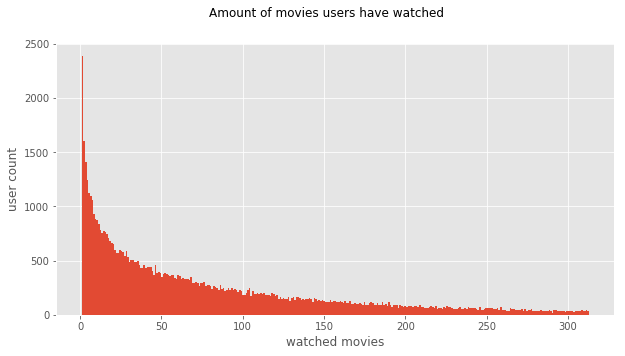

In [77]:
movies = data_rating.groupby('user_id').size().to_frame().sort_values(by=0)
print movies.loc[movies[0] < 314].describe()
plot = movies.loc[movies[0] < 314].plot(kind="hist", bins=313, legend=False, figsize=(10,5))
plot.set_xlabel('watched movies')
plot.set_ylabel('user count')
plt.suptitle('Amount of movies users have watched')
plt.show()

In [11]:
def normalize(df_user_profiles):
    x = df_user_profiles.iloc[:,1:-1].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    
    x_scaled = min_max_scaler.fit_transform(x.T)
    
    df_scaled = pd.DataFrame(x_scaled.T, columns=df_user_profiles.columns.difference(['user_id','rating','genre']))
    
    df_scaled['user_id'] = df_user_profiles['user_id'].values
    df_scaled['genre_count'] = map(lambda x: x /10.0, df_user_profiles['genre_count'].values)
    df_scaled['rating'] = 1.0
    
    return df_scaled

def get_user_profile(user_id, df_rating, data_anime):
    df_anime_genres = pd.get_dummies(data_anime['genre'].str.get_dummies(sep=", ")) # creates genre vectors
    df_anime_vector = pd.concat([data_anime['anime_id'], df_anime_genres], axis=1)
    
    df_user = df_rating.loc[df_rating['user_id'] == user_id]
    df_merged = pd.merge(df_user, df_anime_vector, how='left', left_on='anime_id', right_on='anime_id' 
                        ).drop(['anime_id', 'rating'], axis=1)

    
    avg_genre = df_merged[df_merged.columns.difference(['user_id'])].sum(axis=1)
    
    # Count only 1's
    df_user_sum = df_merged.sum(axis=0).to_frame().T
    df_user_sum.fillna(0, inplace = True)
    df_user_sum = df_user_sum.apply(func=lambda x: x**2,axis=0)

    df_user_sum['genre_count'] = avg_genre.sum() / float(len(avg_genre))
    df_user_sum['user_id'] = user_id
    df_user_sum['rating'] = 10.0

    return df_user_sum

def build_user_profiles(user_ids):
    df_user_profiles = pd.DataFrame()

    for id in user_ids:
        u_prof = get_user_profile(id, data_rating, data_anime)
        df_user_profiles = df_user_profiles.append(u_prof, ignore_index = True)
    
    return df_user_profiles

def get_n_closest_movies(user_profile, n):
    df_anime_genres = pd.get_dummies(data_anime['genre'].str.get_dummies(sep=", ")) # creates genre vectors
    df_anime_genres['rating'] = 0
    df_anime_vector = pd.concat([data_anime['anime_id'], df_anime_genres], axis=1) # anime_id + genre vector
    df_anime_vector['genre_count'] =  df_anime_vector[df_anime_vector.columns.difference(['anime_id'])].sum(axis=1).apply(lambda x: x / 10.0)
    df_anime_vector['rating'] =  df_anime_vector[df_anime_vector.columns.difference(['rating'])].sum(axis=1).apply(lambda x: x / 10.0)

    
    nbrs = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(df_anime_vector.iloc[:,1:])

    user_prof = normalize(user_profile)
    user_prof = user_prof.drop('user_id', axis=1)

    # Get closest neighbours
    distances, indices = nbrs.kneighbors(user_prof)
    
    return distances, indices, user_prof

get_user_profile(9, train_rating, data_anime)

,user_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,genre_count,rating
0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.00,10.00


In [12]:
profile1 = get_user_profile(1, train_rating, data_anime)
profile2 = get_user_profile(2, train_rating, data_anime)

profiles = pd.DataFrame.append(profile1,profile2)
print normalize(profiles)

                Action            Adventure                 Cars  \
0                 0.60                 0.02                 0.00   
1                 0.00                 0.00                 0.00   

                Comedy             Dementia               Demons  \
0                 1.00                 0.00                 0.02   
1                 0.25                 0.00                 0.00   

                 Drama                Ecchi              Fantasy  \
0                 0.12                 0.45                 0.25   
1                 0.00                 0.00                 0.00   

                  Game                Harem               Hentai  \
0                 0.01                 0.52                 0.00   
1                 0.00                 0.00                 0.00   

            Historical               Horror                Josei  \
0                 0.00                 0.01                 0.00   
1                 0.00                 0.00 

In [13]:


profiles = build_user_profiles(train_rating['user_id'].unique().tolist()[:100])
print profiles

distances, indices, org_user = get_n_closest_movies(profiles.head(1), 100)

for ind in indices[0]:
    print data_anime.loc[ind][['name','genre','rating']]

org_user.head()

    user_id  Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  \
0         1    5625        225     0    9409         0     196    841   4225   
1         2       0          0     0       4         0       0      0      0   
2         3    4096       2304     0    1521         0      16    961     25   
3         4     961        169     0     729         0       4     25     36   
4         5   24649       8649    16  106276         1     400   6084  10000   
5         6     144          1     0     225         0       4    100     36   
6         7   15876       3600     0   39204         9     576   2304   5929   
7         8      81          9     0      49         0       0      9      4   
8         9       0          0     0       1         0       0      0      0   
9        10      36          9     0       1         0       0      9      0   
10       11    1444       1681     0    2601         4     121   3249     25   
11       12     196         49     0    

name                      Trigun
genre     Action, Comedy, Sci-Fi
rating                      8.32
Name: 214, dtype: object
name                                         Cowboy Bebop
genre     Action, Adventure, Comedy, Drama, Sci-Fi, Space
rating                                               8.82
Name: 22, dtype: object
name                         Eyeshield 21
genre     Action, Comedy, Shounen, Sports
rating                               8.08
Name: 433, dtype: object
name               Hachimitsu to Clover
genre     Comedy, Drama, Josei, Romance
rating                             8.18
Name: 325, dtype: object
name                         Beet the Vandel Buster
genre     Adventure, Fantasy, Shounen, Supernatural
rating                                         7.06
Name: 3159, dtype: object
name            Cowboy Bebop: Tengoku no Tobira
genre     Action, Drama, Mystery, Sci-Fi, Space
rating                                     8.40
Name: 152, dtype: object
name                  Hungry He

Name: 2087, dtype: object
name                          Mai-Otome
genre     Comedy, Drama, Fantasy, Magic
rating                             7.40
Name: 1937, dtype: object
name                                          Turn A Gundam
genre     Action, Adventure, Drama, Mecha, Military, Sci...
rating                                                 7.76
Name: 945, dtype: object
name                                              Air
genre     Drama, Romance, Slice of Life, Supernatural
rating                                           7.48
Name: 1616, dtype: object
name                  Aishiteruze Baby★★
genre     Comedy, Drama, Romance, Shoujo
rating                              7.58
Name: 1331, dtype: object
name                                Mobile Fighter G Gundam
genre     Adventure, Comedy, Drama, Martial Arts, Mecha,...
rating                                                 7.62
Name: 1236, dtype: object
name                   Shin Shirayuki-hime Densetsu Prétear
genre     Comedy, Dr

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,genre_count,rating
0,0.60,0.02,0.00,1.00,0.00,0.02,0.09,0.45,0.22,0.00,0.49,0.00,0.00,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.73,0.00,0.55,0.08,0.03,0.00,0.00,0.17,0.00,0.01,0.00,0.00,0.02,0.37,0.00,0.00,0.00,0.00,0.53,1.00


In [14]:
distances = {}
indices = {}
user_profile = {}

for idx, profile in profiles.iterrows():
    p = profiles.iloc[idx].to_frame()
    p_id = profiles.iloc[idx]['user_id']
    d, i, u = get_n_closest_movies(p.T, 100)
    
    distances[p_id] = d
    indices[p_id] = i
    user_profile[p_id] = u
    print p_id


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
